In [ ]:
!pip install -q roboflow ultralytics opencv-python-headless matplotlib torch torchvision segmentation-models-pytorch
import sys, ultralytics, cv2
print("Python:", sys.version.splitlines()[0])
print("Ultralytics:", ultralytics.__version__)
print("OpenCV:", cv2.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.8/89.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 119.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Python: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Ultralytics: 8.3.208
OpenCV: 4.10.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir -p /content/drive/MyDrive/GasLeakOutputs

Mounted at /content/drive


In [ ]:
# ROBoflow dataset download
from roboflow import Roboflow
rf = Roboflow(api_key="qyvFAbKU7KoQfQ9Dpc0R")
project = rf.workspace("pranav-hxwbm").project("gas-leak-x7van-osejz")
version = project.version(1)
dataset = version.download("yolov8")
!ls -la

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Gas-Leak-1 in yolov8:: 100%|██████████| 806/806 [00:00<00:00, 8930.65it/s]


total 24
drwxr-xr-x 1 root root 4096 Oct  9 12:58 .
drwxr-xr-x 1 root root 4096 Oct  9 12:44 ..
drwxr-xr-x 4 root root 4096 Oct  7 13:38 .config
drwx------ 5 root root 4096 Oct  9 12:58 drive
drwxr-xr-x 5 root root 4096 Oct  9 12:59 Gas-Leak-1
drwxr-xr-x 1 root root 4096 Oct  7 13:38 sample_data


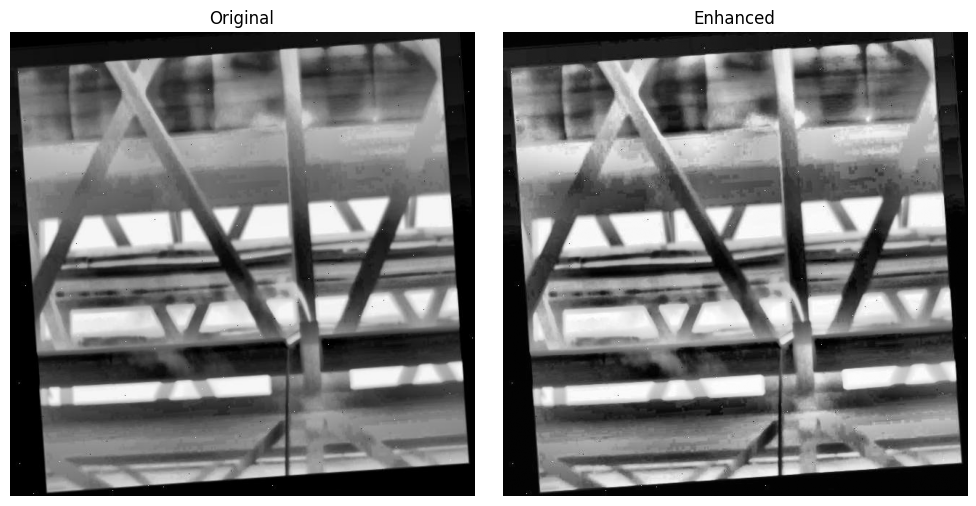

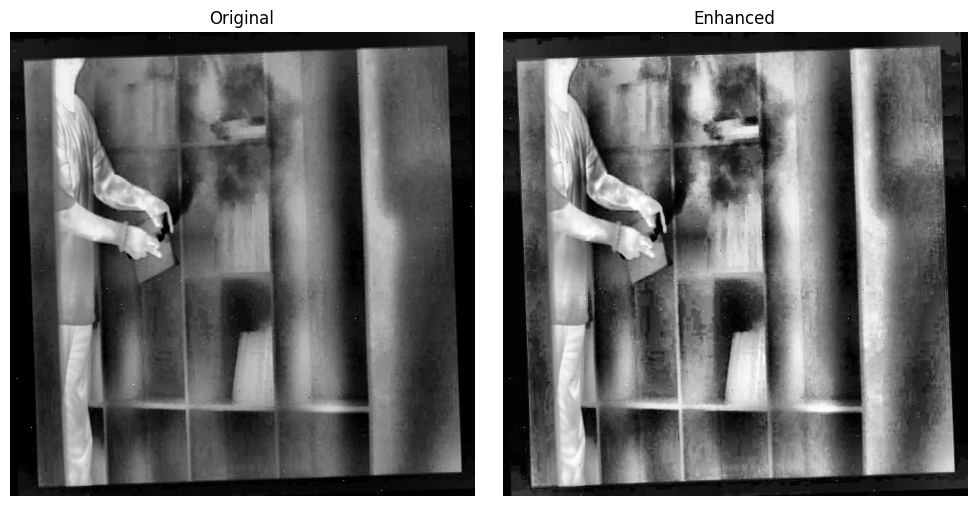

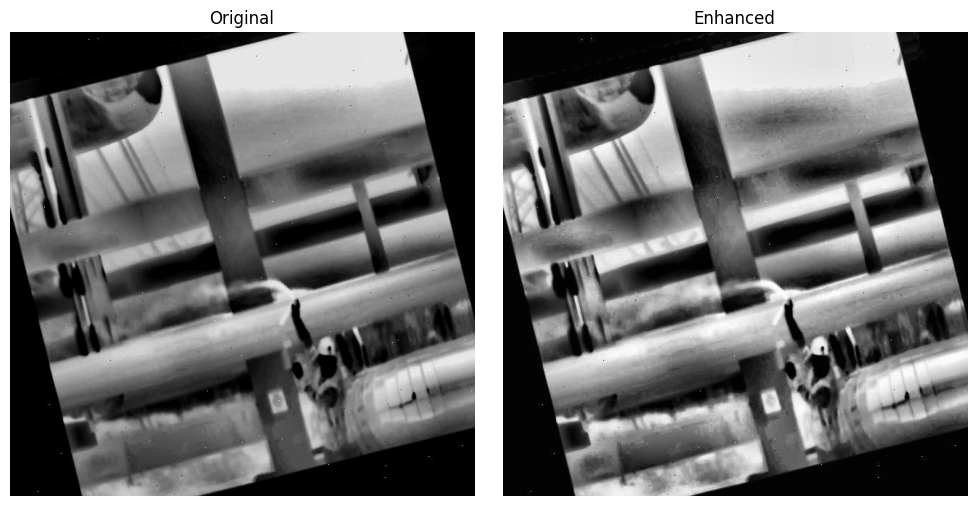

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

def apply_dip_filters(image_path):
    # Read image
    img_bgr = cv2.imread(image_path)
    out = {}

    # Keep original color image
    out['original'] = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Grayscale for processing
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    out['gray'] = gray

    # Gaussian filtering
    gaussian = cv2.GaussianBlur(gray, (5, 5), 0)
    out['gaussian'] = gaussian

    # Bilateral filtering
    bilateral = cv2.bilateralFilter(gray, 9, 75, 75)
    out['bilateral'] = bilateral

    # CLAHE for contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)
    out['enhanced'] = enhanced

    return out

# Get a list of image files (at least 3)
image_dir = "/content/Gas-Leak-1/train/images"
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')][:3]

# Apply filters and display for each image
for image_path in image_files:
    results = apply_dip_filters(image_path)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(results['original'])
    axes[0].set_title('Original')
    axes[0].axis('off')

    axes[1].imshow(results['enhanced'], cmap='gray')
    axes[1].set_title('Enhanced')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
from ultralytics import YOLO

# Load model
model = YOLO("yolov8n.pt")

# Train the model
model.train(
    data="/content/Gas-Leak-1/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    project="/content/drive/MyDrive/GasLeakOutputs",
    name="yolo_train"
)

# Validate the model
metrics = model.val()
print("Validation mAP50-95:", metrics.box.map)  # Accuracy metric

Ultralytics 8.3.208 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Gas-Leak-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 


image 1/1 /content/Gas-Leak-1/test/images/mmexport1695348380773_mp4-12_jpg.rf.18a1f630885416708a1b43e7131f740d.jpg: 640x640 1 gas, 8.1ms
Speed: 2.3ms preprocess, 8.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


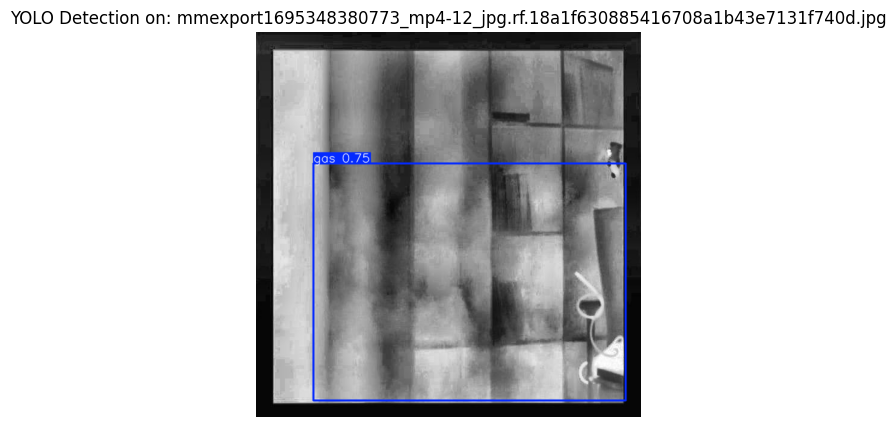


image 1/1 /content/Gas-Leak-1/test/images/mmexport1695348432903_mp4-17_jpg.rf.f7b3e4e58e1c45157fc1b91a55175863.jpg: 640x640 1 gas, 9.3ms
Speed: 2.3ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


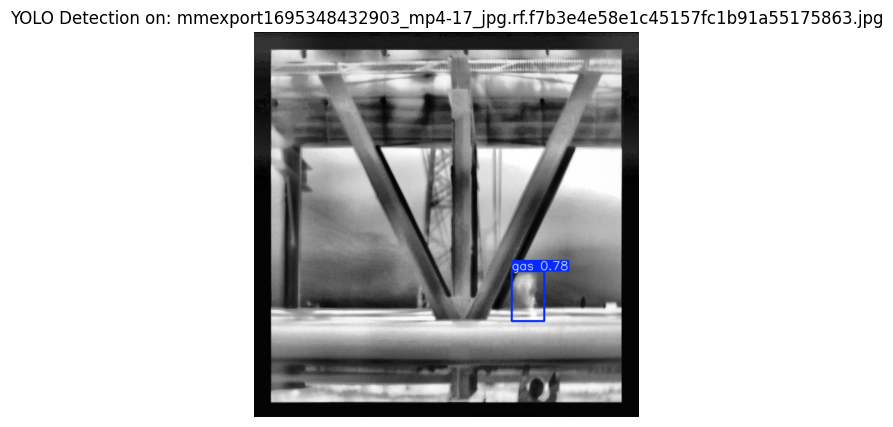


image 1/1 /content/Gas-Leak-1/test/images/mmexport1695348425826_mp4-18_jpg.rf.309d8e1b02482fc606f8a843a36a2790.jpg: 640x640 1 gas, 8.4ms
Speed: 2.2ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


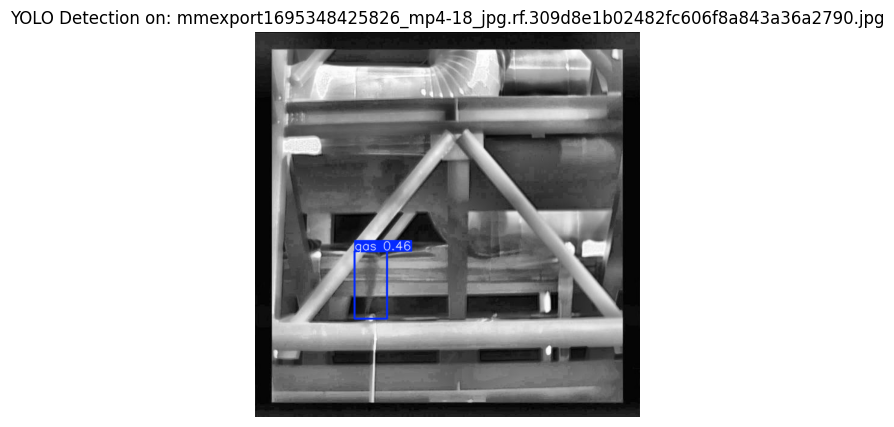

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

# Load trained YOLO model
yolo_model = YOLO("/content/drive/MyDrive/GasLeakOutputs/yolo_train/weights/best.pt")

# Get a list of test image files
test_image_dir = "/content/Gas-Leak-1/test/images"
test_image_files = [os.path.join(test_image_dir, f) for f in os.listdir(test_image_dir) if f.endswith('.jpg') or f.endswith('.png')][:3]

# Perform inference and display results for each image
for test_image_path in test_image_files:
    results = yolo_model.predict(test_image_path)

    # Display the image with detections
    img_with_detections = results[0].plot() # This draws the bounding boxes on the image

    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(img_with_detections, cv2.COLOR_BGR2RGB))
    plt.title(f'YOLO Detection on: {os.path.basename(test_image_path)}')
    plt.axis('off')
    plt.show()